<a href="https://colab.research.google.com/github/SMMaksudulAlam/CS_205_AI_Project_1/blob/main/CS205_AI_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
from queue import PriorityQueue
import time
import matplotlib.pyplot as plt

In [17]:
puzzle = 8
dim = int(math.sqrt(puzzle)) + 1
print(dim)

3


In [18]:
goal_state = []
co_ordinates = {}
for i in range(dim):
  temp = []
  for j in range(dim):
    val = i*dim+(j+1)
    temp.append(val)
    co_ord = [i, j]
    co_ordinates[val] = co_ord
  goal_state.append(temp)

last_val = goal_state[-1][-1]
goal_state[-1][-1] = 0
temp_co_ord = co_ordinates[last_val]
del co_ordinates[last_val]
co_ordinates[0] = temp_co_ord
print(last_val)
print(goal_state)
print(co_ordinates)

9
[[1, 2, 3], [4, 5, 6], [7, 8, 0]]
{1: [0, 0], 2: [0, 1], 3: [0, 2], 4: [1, 0], 5: [1, 1], 6: [1, 2], 7: [2, 0], 8: [2, 1], 0: [2, 2]}


In [19]:
#You can change the goal state here too!
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

In [20]:
def manhattan_distance(state):
  m_dist = 0
  for i in range(dim):
    for j in range(dim):
      val = state[i][j]
      if(val == 0):
        continue
      goal_co_ord = co_ordinates[val]
      i_goal = goal_co_ord[0]
      j_goal = goal_co_ord[1]
      m_dist += abs(i_goal - i) + abs(j_goal - j)
  return m_dist

In [21]:
state = [[7, 2, 4], [5, 0, 6], [8, 3, 1]]
dist = manhattan_distance(state)
print(dist)

14


In [22]:
def misplaced_tile(state):
  m_tile = 0
  for i in range(dim):
    for j in range(dim):
      val = goal_state[i][j]
      if(val == 0):
        continue
      if(val != state[i][j]):
        m_tile += 1
  return m_tile

In [23]:
class Node:
  def __init__(self, state, parent=None, g=0):
    self.state = state
    self.parent = parent
    self.g = g
    self.h = 0
    self.total_cost = 0
    
  def __lt__(self, other_node):
        return self.total_cost < other_node.total_cost

In [24]:
def expand(node):
  state = node.state
  expanded_nodes = []
  blank_i = dim - 1
  blank_j = dim - 1

  for i in range(dim):
    for j in range(dim):
      if(state[i][j] == 0):
        blank_i = i
        blank_j = j
        break
  if(blank_i > 0):
    child = []
    for lst in state:
      child.append(lst[:])
    val = state[blank_i - 1][blank_j]
    child[blank_i][blank_j] = val
    child[blank_i - 1][blank_j] = 0
    child_node = Node(child, state, node.g+1)
    expanded_nodes.append(child_node)

  if(blank_i < dim - 1):
    child = []
    for lst in state:
      child.append(lst[:])
    val = state[blank_i + 1][blank_j]
    child[blank_i][blank_j] = val
    child[blank_i + 1][blank_j] = 0
    child_node = Node(child, state, node.g+1)
    expanded_nodes.append(child_node)

  if(blank_j > 0):
    child = []
    for lst in state:
      child.append(lst[:])
    val = state[blank_i][blank_j - 1]
    child[blank_i][blank_j] = val
    child[blank_i][blank_j - 1] = 0
    child_node = Node(child, state, node.g+1)
    expanded_nodes.append(child_node)

  if(blank_j < dim - 1):
    child = []
    for lst in state:
      child.append(lst[:])
    val = state[blank_i][blank_j + 1]
    child[blank_i][blank_j] = val
    child[blank_i][blank_j + 1] = 0
    child_node = Node(child, state, node.g+1)
    expanded_nodes.append(child_node)

  return expanded_nodes

In [25]:
def uniform_cost_search(node):
  q = PriorityQueue()
  q.put(node)
  is_visited = set()
  number_of_expansion = 0
  s_time = time.process_time()
  max_queue_size = 0
  while (q.empty() == False):
    nde = q.get()
    print(nde.state, 'is the best sub-puzzle to be solved with g(n): '+str(nde.g))
    if(misplaced_tile(nde.state) == 0):
      e_time = time.process_time()
      print("reached the goal state!")
      print("the number of expansion required: "+ str(number_of_expansion))
      print("maximum queue size: "+ str(max_queue_size))
      print("time required: "+str(e_time - s_time))
      return nde
    tple = tuple([item for row in nde.state for item in row])
    if(tple in is_visited):
      #print(q.qsize(), len(is_visited), nde.g)
      continue
    expanded_nodes = expand(nde)
    number_of_expansion += 1
    is_visited.add(tple)

    for child_node in expanded_nodes:
      child_tuple = tuple([item for row in child_node.state for item in row])
      if(child_tuple in is_visited):
        continue
      if(child_tuple not in is_visited):
        child_node.total_cost = child_node.g
        q.put(child_node)
    if(q.qsize() > max_queue_size):
      max_queue_size = q.qsize()
  print("queue is empty!")
  return None

In [26]:
def a_star_with_MD(node):
  q = PriorityQueue()
  q.put(node)
  is_visited = set()
  number_of_expansion = 0
  s_time = time.process_time()
  max_queue_size = 0
  while (q.empty() == False):
    nde = q.get()
    print(nde.state, 'is the best sub-puzzle to be solved with g(n): '+str(nde.g)+ ' and h(n): '+str(nde.h))
    if(misplaced_tile(nde.state) == 0):
      e_time = time.process_time()
      print("reached the goal state!")
      print("the number of expansion required: "+ str(number_of_expansion))
      print("maximum queue size: "+ str(max_queue_size))
      print("time required: "+str(e_time - s_time))
      return nde
    tple = tuple([item for row in nde.state for item in row])
    if(tple in is_visited):
      #print(q.qsize(), len(is_visited), nde.g)
      continue
    expanded_nodes = expand(nde)
    number_of_expansion += 1
    is_visited.add(tple)

    for child_node in expanded_nodes:
      child_tuple = tuple([item for row in child_node.state for item in row])
      if(child_tuple not in is_visited):
        child_node.h = manhattan_distance(child_node.state)
        child_node.total_cost = child_node.g + child_node.h
        q.put(child_node)
    if(q.qsize() > max_queue_size):
      max_queue_size = q.qsize()
  print("queue is empty!")
  return None

In [27]:
def a_star_with_MT(node):
  q = PriorityQueue()
  q.put(node)
  is_visited = set()
  number_of_expansion = 0
  s_time = time.process_time()
  max_queue_size = 0
  while (q.empty() == False):
    nde = q.get()
    print(nde.state, 'is the best sub-puzzle to be solved with g(n): '+str(nde.g)+ ' and h(n): '+str(nde.h))
    if(misplaced_tile(nde.state) == 0):
      e_time = time.process_time()
      print("reached the goal state!")
      print("the number of expansion required: "+ str(number_of_expansion))
      print("maximum queue size: "+ str(max_queue_size))
      print("time required: "+str(e_time - s_time))
      return nde
    tple = tuple([item for row in nde.state for item in row])
    if(tple in is_visited):
      #print(q.qsize(), len(is_visited), nde.g)
      continue
    expanded_nodes = expand(nde)
    number_of_expansion += 1
    is_visited.add(tple)

    for child_node in expanded_nodes:
      child_tuple = tuple([item for row in child_node.state for item in row])
      if(child_tuple not in is_visited):
        child_node.h = misplaced_tile(child_node.state)
        child_node.total_cost = child_node.g + child_node.h
        q.put(child_node)
    if(q.qsize() > max_queue_size):
      max_queue_size = q.qsize()
  print("queue is empty!")
  return None

In [28]:
def main():
  init_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]
  print("Welcome to the Eight Puzzle Solver!")
  mode = input("Enter 1 to use the default puzzle or 2 to create a manual one! ")
  state = []
  if(mode == '1'):
    state = init_state
  if(mode == '2'):
    r_str = input('Enter the 1st row in C1 C2 C3 format: ').split()
    r = []
    for s in r_str:
      r.append(int(s))
    state.append(r)

    r_str = input('Enter the 2nd row in C1 C2 C3 format: ').split()
    r = []
    for s in r_str:
      r.append(int(s))
    state.append(r)

    r_str = input('Enter the 3rd row in C1 C2 C3 format: ').split()
    r = []
    for s in r_str:
      r.append(int(s))
    state.append(r)    

  node = Node(state)
  print("Please select any of the following algorithms to solve the puzzle!")
  print('1. Uniform Cost Search!')
  print('2. A* Search with Manhattan Distance Heuristic!')
  print('3. A* Search with Misplaced Tile Heuristic!')
  algo = input("Enter a number to select the corresponding algorithm! ")

  if(algo == '1'):
    uniform_cost_search(node)
  if(algo == '2'):
    a_star_with_MD(node)
  if(algo == '3'):
    a_star_with_MT(node)
  

In [32]:
if __name__=="__main__":
  main()

Welcome to the Eight Puzzle Solver!
Enter 1 to use the default puzzle or 2 to create a manual one! 2
Enter the 1st row in C1 C2 C3 format: 0 7 2
Enter the 2nd row in C1 C2 C3 format: 4 6 1
Enter the 3rd row in C1 C2 C3 format: 3 5 8
Please select any of the following algorithms to solve the puzzle!
1. Uniform Cost Search!
2. A* Search with Manhattan Distance Heuristic!
3. A* Search with Misplaced Tile Heuristic!
Enter a number to select the corresponding algorithm! 2
[[0, 7, 2], [4, 6, 1], [3, 5, 8]] is the best sub-puzzle to be solved with g(n): 0 and h(n): 0
[[7, 0, 2], [4, 6, 1], [3, 5, 8]] is the best sub-puzzle to be solved with g(n): 1 and h(n): 13
[[7, 2, 0], [4, 6, 1], [3, 5, 8]] is the best sub-puzzle to be solved with g(n): 2 and h(n): 12
[[7, 2, 1], [4, 6, 0], [3, 5, 8]] is the best sub-puzzle to be solved with g(n): 3 and h(n): 11
[[7, 2, 1], [4, 0, 6], [3, 5, 8]] is the best sub-puzzle to be solved with g(n): 4 and h(n): 10
[[7, 2, 1], [4, 5, 6], [3, 0, 8]] is the best sub

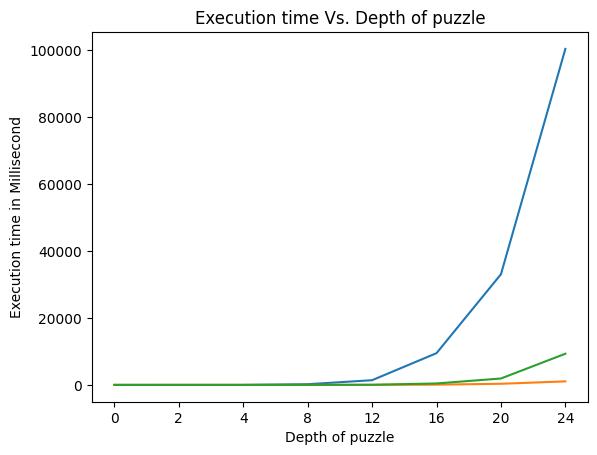

In [30]:
x_labels = ['0', '2', '4', '8', '12', '16', '20', '24']

UC = [1.0, 4.5, 6.6, 211.4, 1415.0, 9489.8, 33060.2, 100376.3]
MD = [0.6, 1.1, 1.9, 10.8, 13.7, 79.6, 343.5, 1058.7]
MT = [0.8, 2.2, 3.8, 12.8, 51.7, 435.3, 1920.2, 9316.7]
# Plot the data
plt.plot(x_labels, UC, label='UC')
plt.plot(x_labels, MD, label='MD')
plt.plot(x_labels, MT, label='MT')

# Add labels and legend
plt.xlabel('Depth of puzzle')
plt.ylabel('Execution time in Millisecond')
plt.title('Execution time Vs. Depth of puzzle')
plt.xlabel('Depth of puzzle')


# Display the plot
plt.show()